TFIDF vectorizer 
Term frequency(t) = (no. of times this appears in  document)/
                    (total no. of document)
    
inverse document frequency = log (toal no. of  document )/
                    (number of document which has this in it) 

In [1]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
vectorizer = TfidfVectorizer()

In [3]:
corpus = [
'This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?', ]

In [4]:
X = vectorizer.fit_transform(corpus)
X.toarray().shape

(4, 9)

In [5]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [6]:
from sklearn.datasets import fetch_20newsgroups

In [7]:
data = fetch_20newsgroups()

In [8]:
dir(data)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [9]:
catagories = data.target_names
catagories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
X=data.data

In [11]:
y = data.target

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
from sklearn.pipeline import Pipeline

In [16]:
model = Pipeline([("vectorizer", TfidfVectorizer()),("mnb",MultinomialNB())])

In [17]:
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [18]:
model.score(X_test, y_test)

0.8448961555457357

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_test,y_pred)

In [22]:
import matplotlib.pyplot as plt


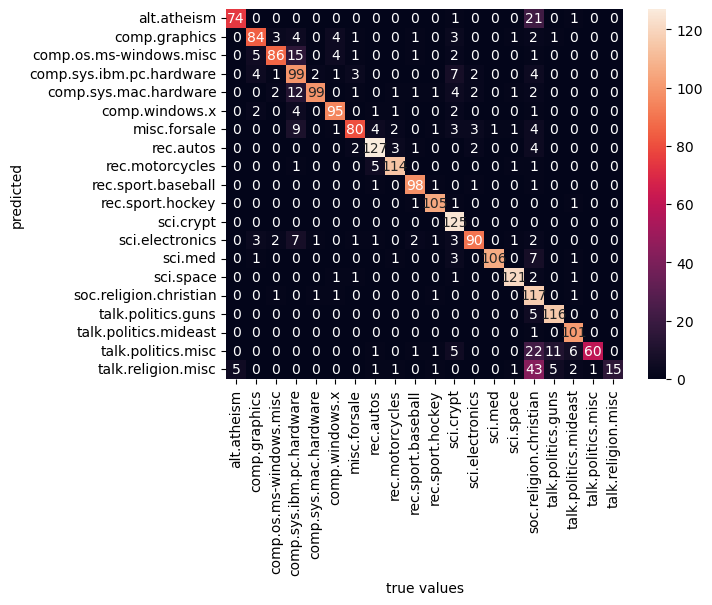

In [23]:
import seaborn as sns
sns.heatmap(cm,annot = True,fmt = "d",xticklabels =catagories,yticklabels= catagories)
plt.xlabel("true values")
plt.ylabel("predicted")
plt.show()